# ONLINE PAYMENT FRAUD DETECTION SYSTEM

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# import dataset
data = pd.read_csv('dataset.csv')
data.head()

In [ ]:
data.shape

In [ ]:
# information of the data
data.info()

In [ ]:
# mean, count , minimum and maximum values of the data
data.describe()

# Data Visualization

In [ ]:
# count the columns with different datatypes like Category, Integer, Float.
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

In [ ]:
# count plot of the Payment type column using Seaborn library.
sns.countplot(x='type', data=data)

In [ ]:
# bar plot for analyzing Type and amount column simultaneously
sns.barplot(x='type', y='amount', data=data)

In [25]:
# distribution of data among both the prediction values.
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [26]:
# Generating 25% sample of data frame
row1 = data.sample(frac = .25) 
row1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
731526,37,TRANSFER,494704.90,C232150879,0.00,0.00,C295007690,1171589.30,1666294.20,0,0
1240650,134,PAYMENT,11483.09,C1318019289,0.00,0.00,M24002264,0.00,0.00,0,0
1309723,136,CASH_IN,93376.45,C191042154,6262862.06,6356238.51,C1000848987,566885.65,473509.20,0,0
2732966,212,CASH_OUT,113128.42,C605911602,130793.00,17664.58,C1127283390,0.00,113128.42,0,0
5869881,403,PAYMENT,4200.98,C7937144,84964.00,80763.02,M1956941473,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
542415,21,PAYMENT,9464.58,C1426995862,165.00,0.00,M359469432,0.00,0.00,0,0
3782794,280,CASH_OUT,7425.48,C1241656274,702.00,0.00,C1536581954,177040.11,184465.59,0,0
1099366,130,CASH_IN,274567.66,C1705655496,13692999.26,13967566.91,C100079527,301960.43,27392.78,0,0
3092670,235,PAYMENT,1846.45,C626701492,0.00,0.00,M679978748,0.00,0.00,0,0


C:\Users\Aamina Akbar\AppData\Local\Temp\ipykernel_7560\2846142092.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['step'], bins=50)


<Axes: xlabel='step', ylabel='Density'>

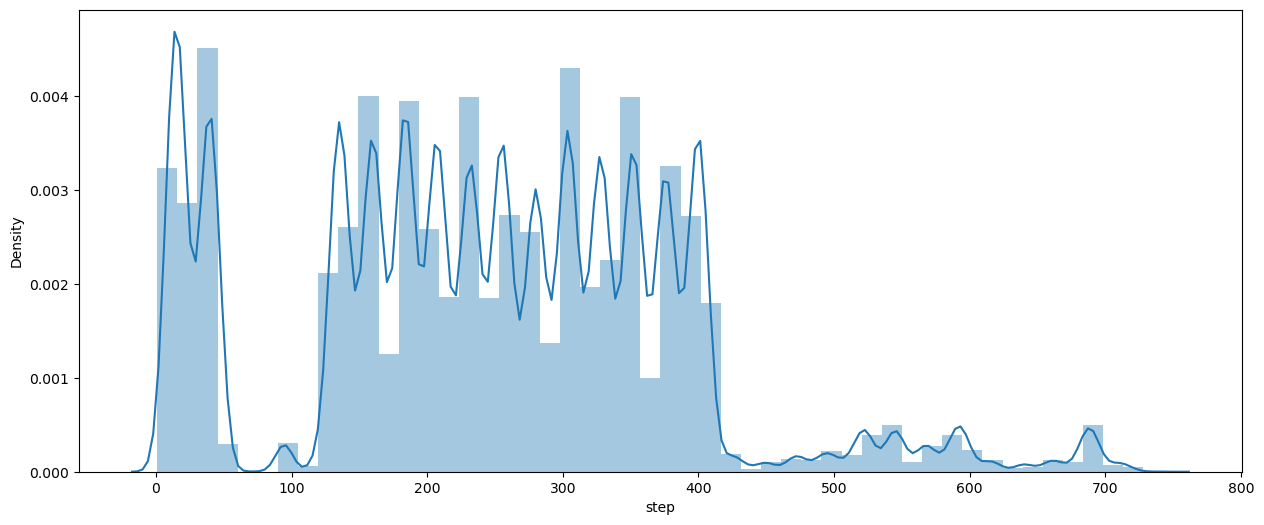

In [27]:
# distribution of the step column using distplot
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)

C:\Users\Aamina Akbar\AppData\Local\Temp\ipykernel_7560\131853721.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),


<Axes: >

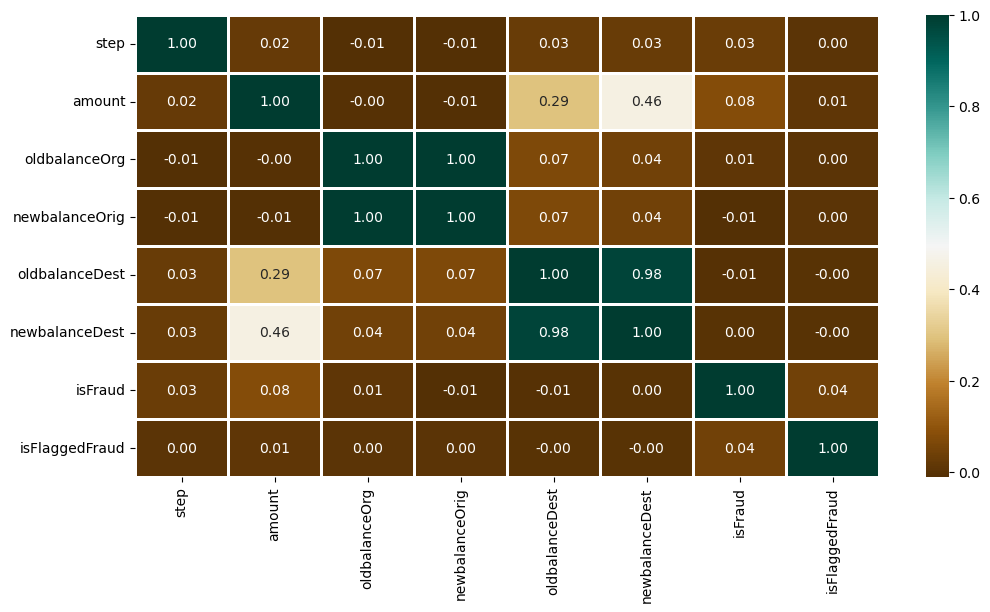

In [28]:
# correlation among different features using Heatmap.
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

# Data Preprocessing

In [29]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [30]:
# drop the irrelevant columns
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

In [31]:
X.shape, y.shape

((6362620, 11), (6362620,))

In [32]:
# split the data into 2 parts : Training and Testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Model Training

LogisticRegression , SVC, RandomForestClassifier

In [ ]:
# importing modules
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Random Forest

In [34]:
# train the model
# random forest
rf_model = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
rf_model.fit(X_train, y_train)

print("Random Forest:")
train_preds = rf_model.predict_proba(X_train)[:, 1]
rf_training_accuracy = ras(y_train, train_preds)
print('Training Accuracy : ', rf_training_accuracy)
# print('Training Accuracy : ', ras(y_train, train_preds))

y_preds = rf_model.predict_proba(X_test)[:, 1]
rf_validation_accuracy = ras(y_test, y_preds)
print('Validation Accuracy : ', rf_validation_accuracy)
# print('Validation Accuracy : ', ras(y_test, y_preds))

Random Forest:
Training Accuracy :  0.9999992846155892
Validation Accuracy :  0.9635718404867615


Logistic Regression

In [36]:
# LogisticRegression()
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

print("Logistic Regression: ")
train_preds = lr_model.predict_proba(X_train)[:, 1]
lr_training_accuracy = ras(y_train, train_preds)
print('Training Accuracy : ', lr_training_accuracy)
# print('Training Accuracy : ', ras(y_train, train_preds))

y_preds = lr_model.predict_proba(X_test)[:, 1]
lr_validation_accuracy = ras(y_test, y_preds)
print('Validation Accuracy : ', lr_validation_accuracy)
# print('Validation Accuracy : ', ras(y_test, y_preds))

Logistic Regression: 
Training Accuracy :  0.8873986280485237
Validation Accuracy :  0.884995827149426


<BarContainer object of 2 artists>

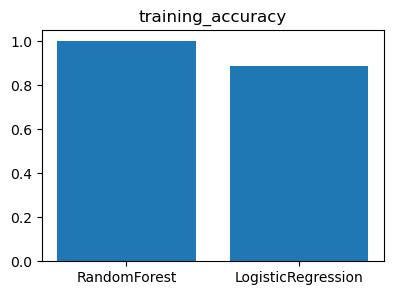

In [50]:
# bar plot for training accuracy of the two models
names = ['RandomForest', 'LogisticRegression']
values = [0.9999992846155892, 0.8873986280485237]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.title("training_accuracy")
plt.bar(names, values)

<BarContainer object of 2 artists>

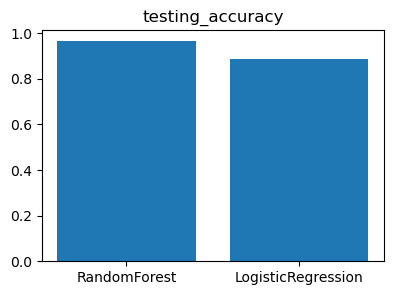

In [52]:
# bar plot for testing accuracy of the two models
names = ['RandomForest', 'LogisticRegression']
values = [0.9635718404867615, 0.884995827149426]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.title("testing_accuracy")
plt.bar(names, values)

In [59]:
# ensemble learning
from sklearn.ensemble import VotingClassifier
clf_voting_model = VotingClassifier(estimators=[('rf', rf_model), ('lr', lr_model)], voting='hard')
clf_voting_training_accuracy = VotingClassifier(estimators=[('rf', rf_training_accuracy), ('lr', lr_training_accuracy)], voting='hard')
clf_voting_validation_accuracy = VotingClassifier(estimators=[('rf', rf_validation_accuracy), ('lr', lr_validation_accuracy)], voting='hard')

clf_voting_model.fit(X_train, y_train.astype(int))
print(clf_voting_model)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=7,
                                                     random_state=7)),
                             ('lr', LogisticRegression())])


In [61]:
mean_accuracy = clf_voting_model.score(X_test, y_test)
print("Overall accuracy of the model: ", mean_accuracy)

Overall accuracy of the model:  0.9992576433397982


***End of the Project***